## Bidder classification

In [5]:
import pandas as pd

bids = pd.read_csv('Data/bids.csv')
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [6]:
print(bids.shape)
print(train.shape)
print(test.shape)

(7656334, 9)
(2013, 4)
(4700, 3)


In [7]:
print("Dataframe shape before merge: " + str(bids.shape))
print("Dataframe keys before merge: " + str(bids.keys()))
result = pd.merge(bids, train, on='bidder_id', how='inner')  # Use 'inner' to avoid nans values, because 'inner' return only samples that are in both of dataframes.
print("\nDataframe shape after merge: " + str(result.keys()))
print("Dataframe keys after merge: " + str(result.shape))
print("\nTOTAL NULL ELEMENTS: \n" + str(result.isnull().sum()))
print("\nHEAD OF DATASET: " + str(result.head(5)))

Dataframe shape before merge: (7656334, 9)
Dataframe keys before merge: Index(['bid_id', 'bidder_id', 'auction', 'merchandise', 'device', 'time',
       'country', 'ip', 'url'],
      dtype='object')

Dataframe shape after merge: Index(['bid_id', 'bidder_id', 'auction', 'merchandise', 'device', 'time',
       'country', 'ip', 'url', 'payment_account', 'address', 'outcome'],
      dtype='object')
Dataframe keys after merge: (3071224, 12)

TOTAL NULL ELEMENTS: 
bid_id                0
bidder_id             0
auction               0
merchandise           0
device                0
time                  0
country            2701
ip                    0
url                   0
payment_account       0
address               0
outcome               0
dtype: int64

HEAD OF DATASET:    bid_id                              bidder_id auction merchandise   device  \
0       1  668d393e858e8126275433046bbd35c6tywop   aeqok   furniture   phone1   
1      25  668d393e858e8126275433046bbd35c6tywop   38v0

# Dataset Description

## Fields

1. **bid_id**  
   - **Description**: Unique ID for this bid.  
   - **Type**: String/Integer.  

2. **bidder_id**  
   - **Description**: Unique identifier of a bidder (same as the `bidder_id` used in `train.csv` and `test.csv`).  
   - **Type**: String/Integer.  

3. **auction**  
   - **Description**: Unique identifier of an auction (asta).  
   - **Type**: String.  

4. **merchandise** ( **DROP** )  
   - **Description**: The category of the auction site campaign. This indicates that the bidder might come to the site via a search term (e.g., "home goods") but ends up bidding on something like "sporting goods".  
   - **Type**: Categorical.  
   - **Note**: Dropped from analysis.

5. **device** ( **DROP** )  
   - **Description**: Phone model of a visitor.  
   - **Type**: String.  
   - **Note**: Dropped from analysis.

6. **time**  
   - **Description**: The time the bid is made (transformed for privacy).  
   - **Type**: Timestamp.  
   - **Action**: **Categorization**.

7. **country**  
   - **Description**: The country associated with the bidder's IP address.  
   - **Type**: Categorical.

8. **ip** ( **DROP** )  
   - **Description**: IP address of a bidder (obfuscated for privacy).  
   - **Type**: String.  
   - **Note**: Dropped from analysis.

9. **url**  
   - **Description**: The URL where the bidder was referred from (obfuscated for privacy).  
   - **Type**: String.

10. **payment_account**  
    - **Description**: Payment account associated with the bidder (obfuscated for privacy).  
    - **Type**: String.

11. **address**  
    - **Description**: Mailing address of the bidder (obfuscated for privacy).  
    - **Type**: String.

12. **outcome**  
    - **Description**: Label indicating whether the bidder is a robot (1.0) or human (0.0).  
    - **Type**: Binary.


## Feature Extraction

1. bidder_god: boolean (0/1) --> 
2. immediate_bid: boolean (0/1) per bid / count per bidder --> 
3. number_of_payment_methods: int --> 
4. bidder_activity: int --> 
5. number_of_device: int --> 
6. number_of_country ?  


## IP RESPONSE

In [8]:
import requests

# for i in range(len())
ip = "32.44.186.109"  # Esempio di IP
response = requests.get(f'http://ip-api.com/json/{ip}')
data = response.json()
print(f"Nazione: {data['country']}")

Nazione: United States


## FIRST TRY

In [9]:
print(result.keys())
result.head(5)
print(result["ip"].nunique()) # 1.030.950
print(result["time"].nunique()) # 742.669 
print(result["url"].nunique()) # 663.873
print(result["auction"].nunique()) # 12.740
print(result["device"].nunique()) # 5.729
print(result["payment_account"].nunique()) # 1.984
print(result["address"].nunique()) # 1.984
print(result["country"].nunique()) # 198
print(result["merchandise"].nunique()) # 10

# Drop bid_id, time, url, ip
result.drop(["bid_id", "ip", "url", "time"], axis=1, inplace=True)

Index(['bid_id', 'bidder_id', 'auction', 'merchandise', 'device', 'time',
       'country', 'ip', 'url', 'payment_account', 'address', 'outcome'],
      dtype='object')
1030950
742669
663873
12740
5729
1984
1984
198
10


In [10]:
# Encoding features

# Fix none in country
mode_country = result["country"].mode()
print("Mode of the feature 'Country': " + str(mode_country.iloc[0]))
for country in result["country"]:
	if country == None:
		country = mode_country.iloc[0]

# Label Encoding for merchandise, country, 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
result["merchandise"] = encoder.fit_transform(result['merchandise'])
result["country"] = encoder.fit_transform(result['country'])
result["payment_account"] = encoder.fit_transform(result['payment_account'])
result["address"] = encoder.fit_transform(result['address'])
result["device"] = encoder.fit_transform(result['device'])
result["auction"] = encoder.fit_transform(result['auction'])
result["bidder_id"] = encoder.fit_transform(result['bidder_id'])
result['outcome'] = result['outcome'].astype(int)

# Drop columns that have been encoded 
# result.drop(["merchandise", "country", "payment_account", "address", "device", "auction"], axis=1, inplace=True)
result.head(5)

Mode of the feature 'Country': in


,bidder_id,auction,merchandise,device,country,payment_account,address,outcome
0,797,3645,4,1,84,1497,438,0
1,797,1092,4,3090,15,1497,438,0
2,797,3645,4,2627,84,1497,438,0
3,797,6953,4,2908,84,1497,438,0
4,797,6099,4,4459,84,1497,438,0


In [11]:
X = result.iloc[:, result.columns != "outcome"]
y = result.iloc[:, result.columns == "outcome"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Total value of train labels" + str(y_train.value_counts()))
print("\nTotal value of test labels" + str(y_test.value_counts()))

Total value of train labelsoutcome
0          1861165
1           288691
Name: count, dtype: int64

Total value of test labelsoutcome
0          797643
1          123725
Name: count, dtype: int64


In [12]:
result.drop(["bidder_id", "address", "payment_account"], axis=1, inplace=True)
result.head(5)

,auction,merchandise,device,country,outcome
0,3645,4,1,84,0
1,1092,4,3090,15,0
2,3645,4,2627,84,0
3,6953,4,2908,84,0
4,6099,4,4459,84,0


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98    531762
           1       0.87      0.80      0.83     82483

    accuracy                           0.96    614245
   macro avg       0.92      0.89      0.90    614245
weighted avg       0.96      0.96      0.96    614245



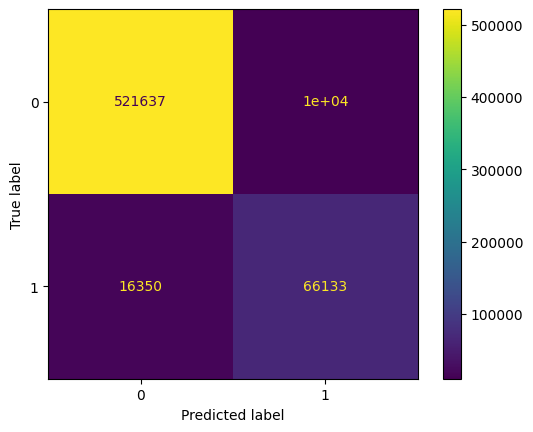

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X = result.iloc[:, result.columns != "outcome"]
y = result.iloc[:, result.columns == "outcome"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay
cm_dt = ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

## Analysis Summary

From the previous analysis, we understand that our model (in this case, a **Decision Tree**) learns too much from the training data and is not able to generalize, leading to **overfitting**.

### Steps to Prevent Overfitting:
1. **Reduce correlations between features**:
   - Analyze the feature set to identify highly correlated features.
   - Remove or transform correlated features to minimize redundancy.

2. **Introduce new significant features (Feature Extraction)**:
   - Engineer meaningful features from the existing dataset.
   - Use domain knowledge or statistical techniques to create features that improve model performance.
